# 载入数据

In [2]:
import pandas as pd
df = pd.read_excel('./job_detail.xlsx')
# 将载入的数据修改为列表
df['职位详情'] = [eval(df['职位详情'][i]) for i in range(len(df['职位详情']))]
df = df.drop(['Unnamed: 0'], axis=1)

In [3]:
# 清理与输入关键词相同的词汇
def clean_self(self, self_word):
    result = []
    for temp in self:
        middle = []
        if temp is not None:
            for word in temp:
                if self_word not in word:
                    middle.append(word)
        result.append(middle)
    return result

# 制作城市与其他项目关系图

### 不同公司行业的城市分布

In [4]:
this = df

In [5]:
# 使用 replace 函数批量修改数据
this['工作所在省份'] = this['工作所在省份'].replace({'内蒙古自治区': '内蒙古'})
this['工作所在省份'] = this['工作所在省份'].replace({'宁夏回族自治区': '宁夏'})
this['工作所在省份'] = this['工作所在省份'].replace({'广西壮族自治区': '广西省'})
this['工作所在省份'] = this['工作所在省份'].replace({'新疆维吾尔自治区': '新疆'})
this['工作所在省份'] = this['工作所在省份'].replace({'西藏自治区': '西藏'})

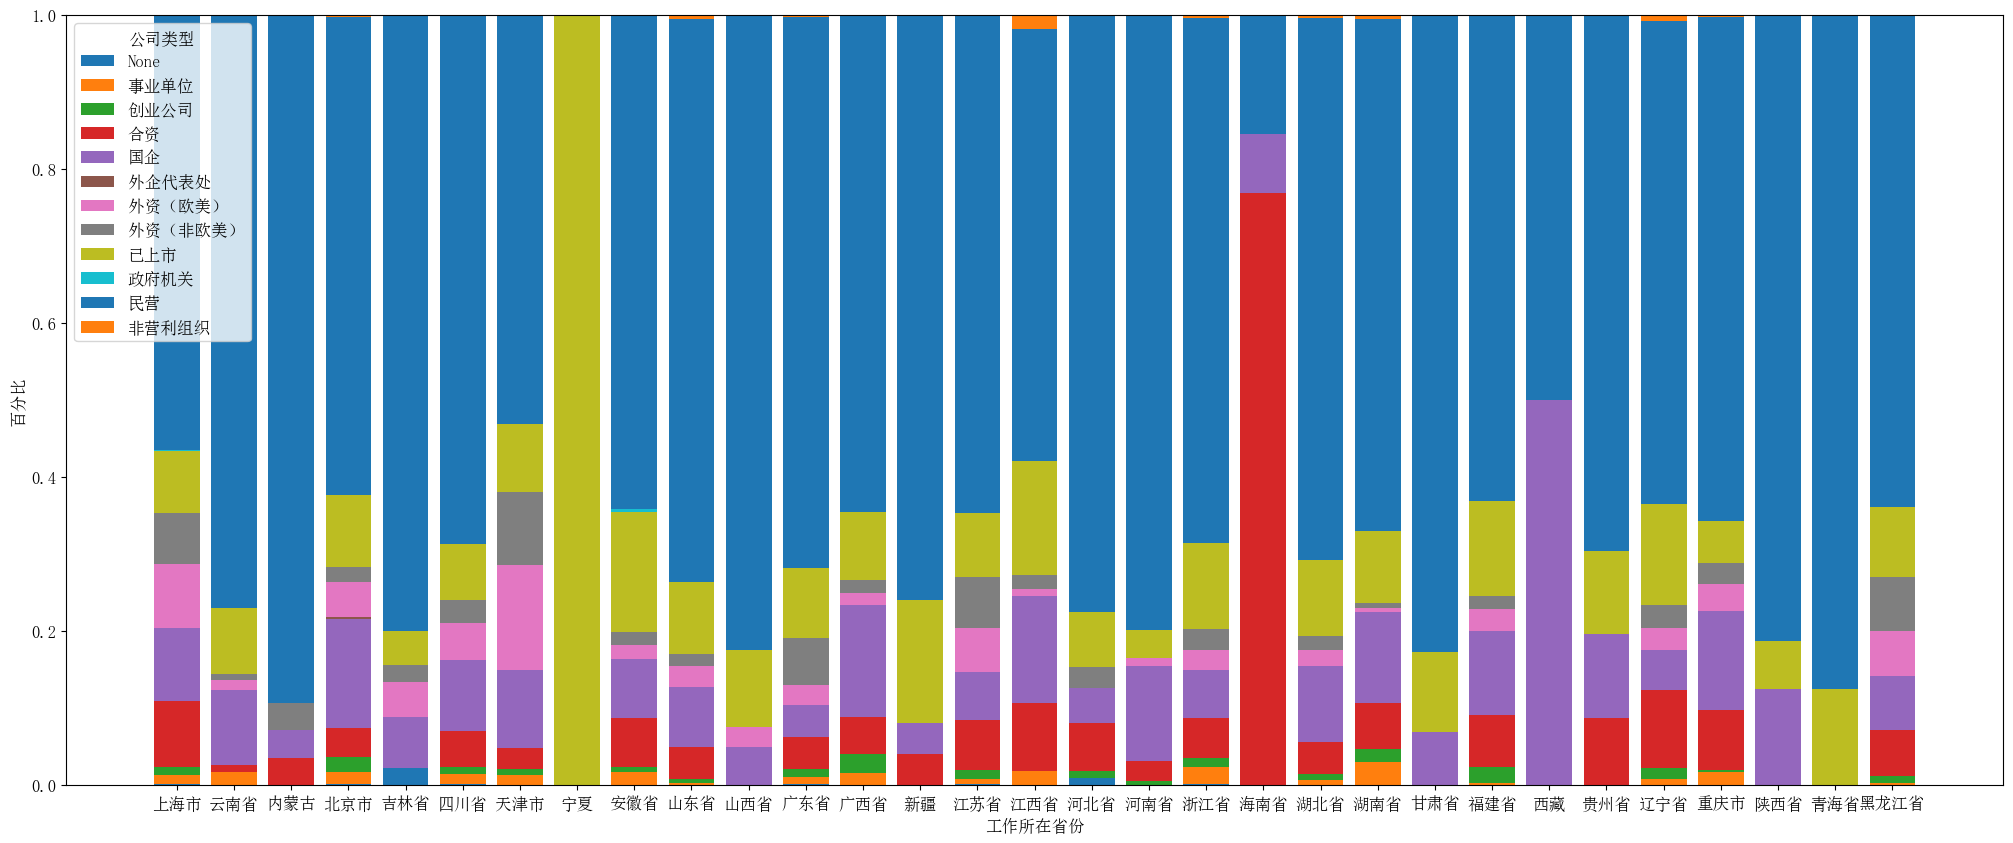

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 统计每个职位类别中各个学历要求的数量
counts = df.groupby(['公司类型', '工作所在省份']).size().unstack()

# 计算每个学历要求在其所在分组内的百分比
totals = counts.sum(axis=1)
percentages = counts.div(counts.sum(axis=0), axis=1)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# # 绘制条形图
# fig, ax = plt.subplots(figsize=(10, 6))

categories = percentages.index
for i, category in enumerate(categories):
    ax.bar(
        percentages.columns,
        percentages.loc[category],
        bottom = percentages.iloc[:i].sum(),
        label = category
    )

ax.set_xlabel('工作所在省份')
ax.set_ylabel('百分比')
ax.legend(title='公司类型')
plt.show()


### 不同公司类型的工作经验要求

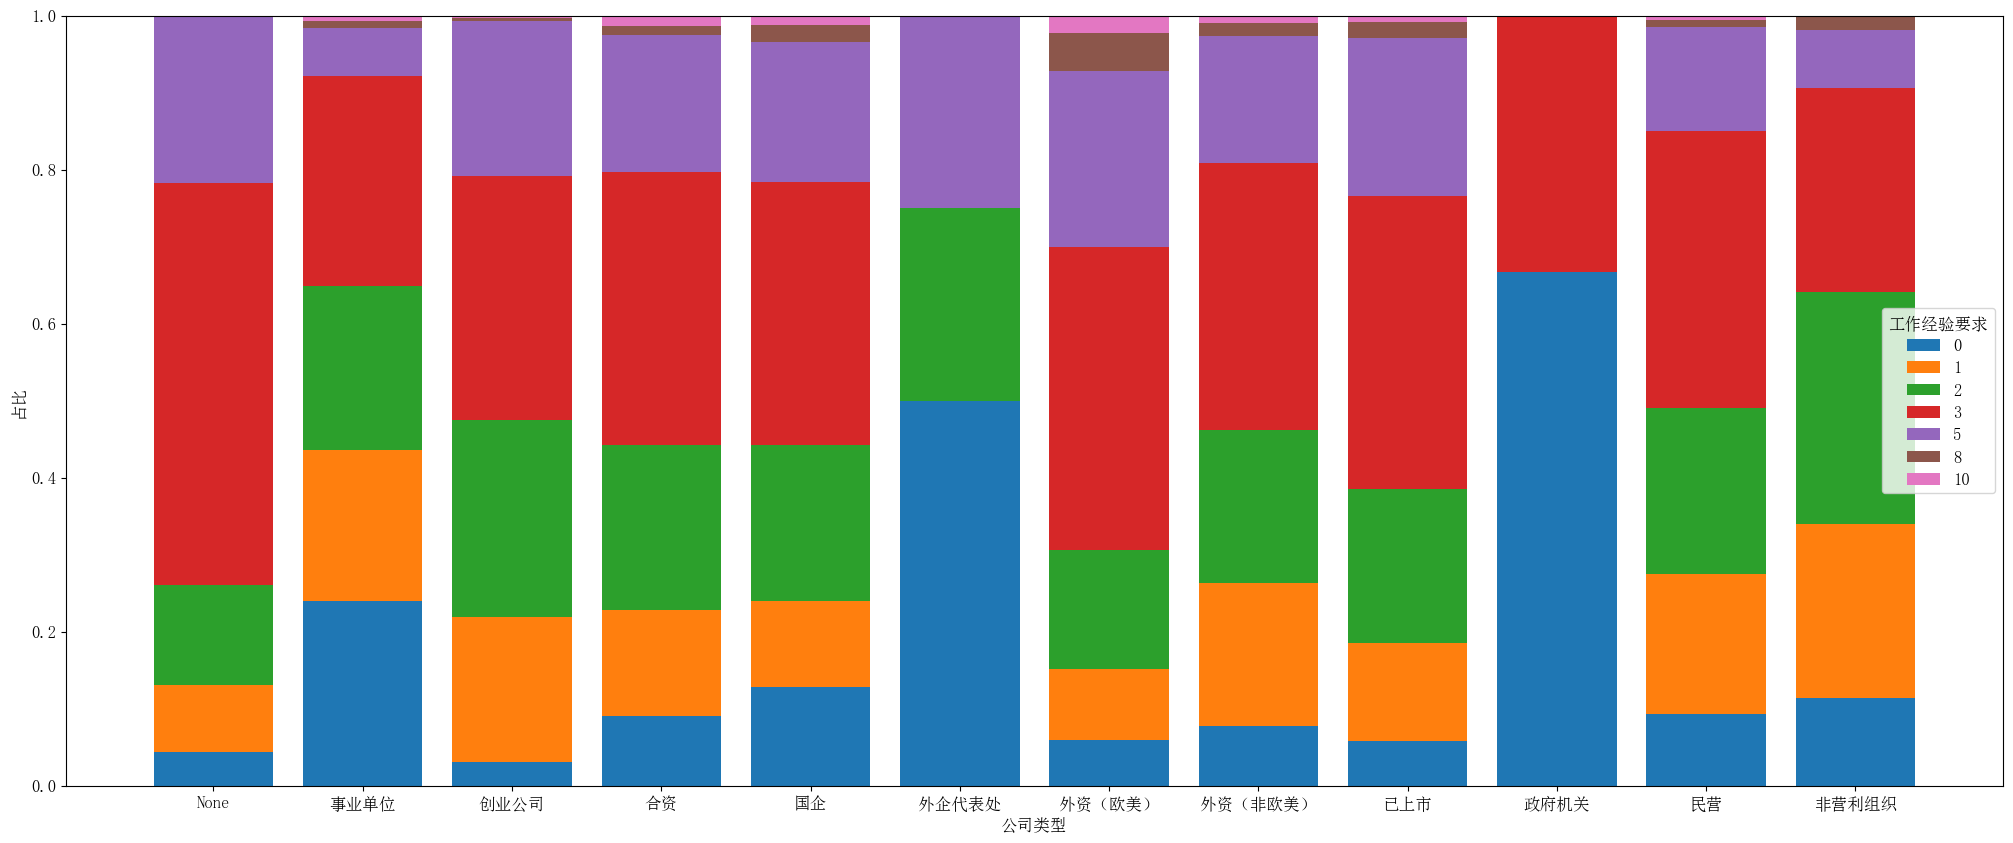

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 统计每个职位类别中各个学历要求的数量
counts = df.groupby(['工作经验要求', '公司类型']).size().unstack()

# 计算每个学历要求在其所在分组内的百分比
totals = counts.sum(axis=1)
percentages = counts.div(counts.sum(axis=0), axis=1)
# 设置字体
config = {
    "font.family": "serif",  # 使用衬线体
    "font.serif": ["SimSun"],  # 全局默认使用衬线宋体
    "font.size": 12,  # 五号，10.5磅
    "axes.unicode_minus": False,
    "mathtext.fontset": "stix",  # 设置 LaTeX 字体，stix 近似于 Times 字体
}
plt.rcParams.update(config)
# 设置画布颜色
# plt.gcf().set_facecolor('lightblue')
# Create a figure object
fig = plt.figure(figsize=(25,10))
# Add a subplot to the figure
ax = fig.add_subplot()
ax.patch.set_facecolor('white')
# # 绘制条形图
# fig, ax = plt.subplots(figsize=(10, 6))

categories = percentages.index
for i, category in enumerate(categories):
    ax.bar(
        percentages.columns,
        percentages.loc[category],
        bottom = percentages.iloc[:i].sum(),
        label = category
    )

ax.set_xlabel('公司类型')
ax.set_ylabel('占比')
ax.legend(title='工作经验要求')
plt.show()
